# **ML Day05**

In [1]:
import pandas as pd
df = pd.read_csv('./data/wine_data.csv')
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [2]:
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'class'],
      dtype='object')

In [3]:
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']
X = df[features]
y = df['class']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_tn, X_te, y_tn, y_te = train_test_split(X, y, stratify=y, random_state=0)
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [5]:
from sklearn import svm
clf_svm_lr = svm.SVC(kernel='linear')
clf_svm_lr.fit(X_tn_std, y_tn)

SVC(kernel='linear')

In [6]:
pred_svm = clf_svm_lr.predict(X_te_std)
print(pred_svm)

[2 0 1 0 2 2 2 2 0 2 0 0 1 2 0 0 0 1 2 0 0 2 2 2 1 0 1 0 1 0 1 1 1 1 1 0 1
 1 2 1 0 1 0 1 1]


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_te, pred_svm)
precision = precision_score(y_te, pred_svm, average='macro')
recall = recall_score(y_te, pred_svm, average='macro')
f1 = f1_score(y_te, pred_svm, average='macro')
conf_matrix = confusion_matrix(y_te, pred_svm)
class_report = classification_report(y_te, pred_svm)

print(f'accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1-score : {f1}')
print(conf_matrix)
print(class_report)


accuracy : 0.9777777777777777
precision : 0.9791666666666666
recall : 0.9814814814814815
f1-score : 0.9797235023041475
[[15  0  0]
 [ 1 17  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        18
           2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [18]:
df = pd.read_csv('./data/wine_data.csv')
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']
X = df[features]
y = df['class']

X_tn, X_te, y_tn, y_te = train_test_split(X, y, stratify=y, random_state=0)
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = svm.SVC(kernel='linear')
clf3 = GaussianNB()

clf_voting = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('svm', clf2),
        ('gnb', clf3)
    ],
    voting='hard',
    weights=[1,1,1])

clf_voting.fit(X_tn_std, y_tn)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svm', SVC(kernel='linear')),
                             ('gnb', GaussianNB())],
                 weights=[1, 1, 1])

In [20]:
pred_voting = clf_voting.predict(X_te_std)
print(pred_voting)

[2 0 1 0 2 2 2 2 0 2 0 0 1 2 0 0 0 1 2 0 0 2 2 2 1 0 1 0 1 0 1 1 1 1 1 0 1
 1 2 1 1 1 0 1 1]


In [21]:
accuracy = accuracy_score(y_te, pred_voting)
precision = precision_score(y_te, pred_voting, average='macro')
recall = recall_score(y_te, pred_voting, average='macro')
f1 = f1_score(y_te, pred_voting, average='macro')
conf_matrix = confusion_matrix(y_te, pred_voting)
class_report = classification_report(y_te, pred_voting)

print(f'accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1-score : {f1}')
print(conf_matrix)
print(class_report)

accuracy : 1.0
precision : 1.0
recall : 1.0
f1-score : 1.0
[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



---

In [40]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('./data/wine_data.csv')
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)
clf_rf = RandomForestClassifier(max_depth=2,random_state=0)
clf_rf.fit(X_tn_std, y_tn)



pred_rf = clf_rf.predict(X_te_std)
print(pred_rf)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [42]:
accuracy = accuracy_score(y_te, pred_rf)
precision = precision_score(y_te, pred_rf, average='macro')
recall = recall_score(y_te, pred_rf, average='macro')
f1 = f1_score(y_te, pred_rf, average='macro')
conf_matrix = confusion_matrix(y_te, pred_rf)
class_report = classification_report(y_te, pred_rf)

print(f'accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1-score : {f1}')
print(conf_matrix)
print(class_report)

accuracy : 0.9555555555555556
precision : 0.943355119825708
recall : 0.9682539682539683
f1-score : 0.9536244800950685
[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



---

In [43]:
from sklearn.ensemble import BaggingClassifier
df = pd.read_csv('./data/wine_data.csv')
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)
clf_rf = RandomForestClassifier(max_depth=2,random_state=0)
clf_rf.fit(X_tn_std, y_tn)

clf_bagging = BaggingClassifier(estimator=GaussianNB(), n_estimators=10, random_state = 0)
clf_bagging.fit(X_tn_std, y_tn)
pred_bagging = clf_bagging.predict(X_te_std)

accuracy = accuracy_score(y_te, pred_bagging)
precision = precision_score(y_te, pred_bagging, average='macro')
recall = recall_score(y_te, pred_bagging, average='macro')
f1 = f1_score(y_te, pred_bagging, average='macro')
conf_matrix = confusion_matrix(y_te, pred_bagging)
class_report = classification_report(y_te, pred_bagging)

print(f'accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1-score : {f1}')
print(conf_matrix)
print(class_report)

accuracy : 0.9555555555555556
precision : 0.943355119825708
recall : 0.9682539682539683
f1-score : 0.9536244800950685
[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



---

In [44]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(random_state=0)
clf_ada.fit(X_tn_std, y_tn)
pred_ada = clf_ada.predict(X_te_std)

accuracy = accuracy_score(y_te, pred_ada)
precision = precision_score(y_te, pred_ada, average='macro')
recall = recall_score(y_te, pred_ada, average='macro')
f1 = f1_score(y_te, pred_ada, average='macro')
conf_matrix = confusion_matrix(y_te, pred_ada)
class_report = classification_report(y_te, pred_ada)

print(f'accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1-score : {f1}')
print(conf_matrix)
print(class_report)



accuracy : 0.8666666666666667
precision : 0.8970588235294118
recall : 0.8998015873015873
f1-score : 0.8918128654970761
[[15  1  0]
 [ 5 16  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.76      0.84        21
           2       1.00      1.00      1.00         8

    accuracy                           0.87        45
   macro avg       0.90      0.90      0.89        45
weighted avg       0.88      0.87      0.87        45



In [45]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbt = GradientBoostingClassifier(max_depth=2, learning_rate=0.1, random_state=0)
clf_gbt.fit(X_tn_std, y_tn)
pred_gbt = clf_gbt.predict(X_te_std)

accuracy = accuracy_score(y_te, pred_gbt)
precision = precision_score(y_te, pred_gbt, average='macro')
recall = recall_score(y_te, pred_gbt, average='macro')
f1 = f1_score(y_te, pred_gbt, average='macro')
conf_matrix = confusion_matrix(y_te, pred_gbt)
class_report = classification_report(y_te, pred_gbt)

print(f'accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1-score : {f1}')
print(conf_matrix)
print(class_report)



accuracy : 0.9555555555555556
precision : 0.943355119825708
recall : 0.9682539682539683
f1-score : 0.9536244800950685
[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



---

In [46]:
from sklearn.ensemble import StackingClassifier

clf1 = svm.SVC(kernel='linear', random_state=1)
clf2 = GaussianNB()

clf_stacking = StackingClassifier(
    estimators=[
        ('svm', clf1),
        ('gnb', clf2)
    ],
    final_estimator=LogisticRegression())
clf_stacking.fit(X_tn_std, y_tn)

pred_stacking = clf_stacking.predict(X_te_std)

accuracy = accuracy_score(y_te, pred_stacking)
precision = precision_score(y_te, pred_stacking, average='macro')
recall = recall_score(y_te, pred_stacking, average='macro')
f1 = f1_score(y_te, pred_stacking, average='macro')
conf_matrix = confusion_matrix(y_te, pred_stacking)
class_report = classification_report(y_te, pred_stacking)

print(f'accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1-score : {f1}')
print(conf_matrix)
print(class_report)

accuracy : 0.9555555555555556
precision : 0.943355119825708
recall : 0.9682539682539683
f1-score : 0.9536244800950685
[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



In [47]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

param_grid={'kernel':('linear','rbf'), 'C':[0.5,1,10,100]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
svc = svm.SVC(random_state=0)
grid_cv = GridSearchCV(svc, param_grid, cv=kfold, scoring='accuracy')
grid_cv.fit(X_tn_std, y_tn)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(random_state=0),
             param_grid={'C': [0.5, 1, 10, 100], 'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [50]:
import numpy as np

np.transpose(pd.DataFrame(grid_cv.cv_results_))

,0,1,2,3,4,5,6,7
mean_fit_time,0.000832,0.000958,0.000569,0.000663,0.000511,0.00061,0.000482,0.000576
std_fit_time,0.000168,0.000217,0.000023,0.000022,0.000008,0.000009,0.000017,0.000019
mean_score_time,0.000423,0.000466,0.000283,0.000326,0.000256,0.000296,0.00024,0.000295
std_score_time,0.000158,0.000136,0.000008,0.00001,0.000003,0.000003,0.000003,0.000029
param_C,0.5,0.5,1,1,10,10,100,100
param_kernel,linear,rbf,linear,rbf,linear,rbf,linear,rbf
params,"{'C': 0.5, 'kernel': 'linear'}","{'C': 0.5, 'kernel': 'rbf'}","{'C': 1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'rbf'}","{'C': 10, 'kernel': 'linear'}","{'C': 10, 'kernel': 'rbf'}","{'C': 100, 'kernel': 'linear'}","{'C': 100, 'kernel': 'rbf'}"
split0_test_score,0.888889,0.962963,0.888889,0.925926,0.888889,0.925926,0.888889,0.925926
split1_test_score,0.962963,1.0,0.962963,0.962963,0.962963,0.962963,0.962963,0.962963
split2_test_score,0.925926,0.962963,0.925926,0.962963,0.925926,0.962963,0.925926,0.962963


In [51]:
grid_cv.best_score_

0.9774928774928775

In [52]:
grid_cv.best_params_

{'C': 0.5, 'kernel': 'rbf'}

In [53]:
cls = grid_cv.best_estimator_
cls

SVC(C=0.5, random_state=0)

(100, 2)
(100,)


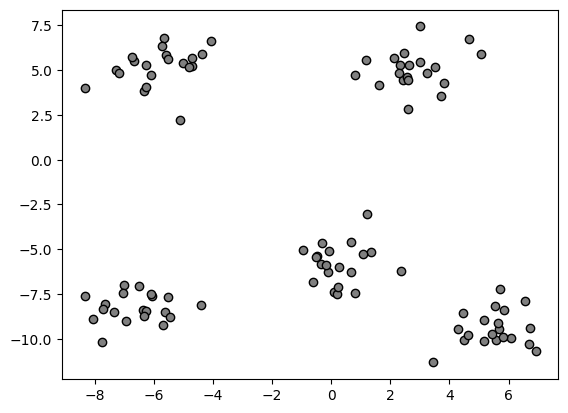

In [59]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, n_features=2, centers=5, random_state=10)
print(X.shape)
print(y.shape)
plt.scatter(X[:,0], X[:,1], c='gray', edgecolor='black', marker = 'o')
plt.show()


In [60]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=5, init='random', n_init=10, max_iter=100, random_state=0)
kmc.fit(X)
label_kmc = kmc.labels_
print(label_kmc)

[1 4 3 0 2 1 1 3 2 1 3 1 2 0 2 1 4 0 2 1 1 0 4 3 1 1 0 2 3 4 0 0 2 0 1 2 3
 0 3 4 0 0 0 2 3 3 1 2 4 2 4 2 1 3 2 2 0 4 0 3 2 4 4 0 1 4 2 4 2 3 3 1 4 2
 0 0 3 4 1 1 2 2 4 0 4 3 0 3 0 3 4 3 1 4 4 4 3 1 1 3]


---

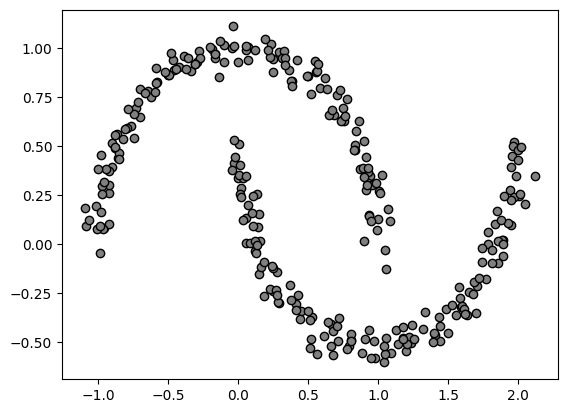

In [61]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

plt.scatter(X[:,0], X[:,1], c='gray', edgecolor='black', marker='o')
plt.show()

In [62]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2)
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


In [63]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_dbs)
print(sil_score)

0.3284782012631504
